In [4]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:
players_url <- "https://raw.githubusercontent.com/rachelbmgr/toy_ds_project/refs/heads/main/players.csv"

In [5]:
players <- read_csv(players_url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


***Question 1**

The players data set has 196 observations. There are 7 variables:
 - experience - the players level of experience: Beginner, Amateur, Regular,  Pro or Veteran
 - subscribed
 - hashedEmail: email of player, hashed for confidentiality
 - played_hours - number of hours the player spent on the server, minimum was 0 hours and the maximum was 223.1 hours
 - name: the name of the player
 - gender: Male, Female, Non-binary, Agender, Two-Spirited, Other or Prefer not to say
 - Age: the age of the player, with a range of 8 to 50

A potential issue in the data set is that under the age column, there is a few "NA"s instead of an age. 


In [23]:
#summary statistics for question 1
summarize(players,
          min_age = min(Age, na.rm = TRUE),
          max_age = max(Age, na.rm = TRUE))

summarize(players,
          min_played_hours = min(played_hours ),
          max_played_hours = max(played_hours))

min_age,max_age
<dbl>,<dbl>
8,50


min_played_hours,max_played_hours
<dbl>,<dbl>
0,223.1


**Question 2**

I will be adressing Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

The specific question I have formulated is Can the age of a player and their play time on the server predict their whether they are subscribed or not to the newsletter?

Using the Age and played_hours variables as predictor variables, I will use KNN classification to determine a new observation of subscribe (False or True) as a response variable. I will wrangle my data by filtering only the played_hours, Age and subscribe columns. I will also remove any columns with Age as 'NA'


**Question 3**

In [73]:

# Loading the players data set into R 
players_url <- "https://raw.githubusercontent.com/rachelbmgr/toy_ds_project/refs/heads/main/players.csv"
players <- read_csv(players_url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.904639




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



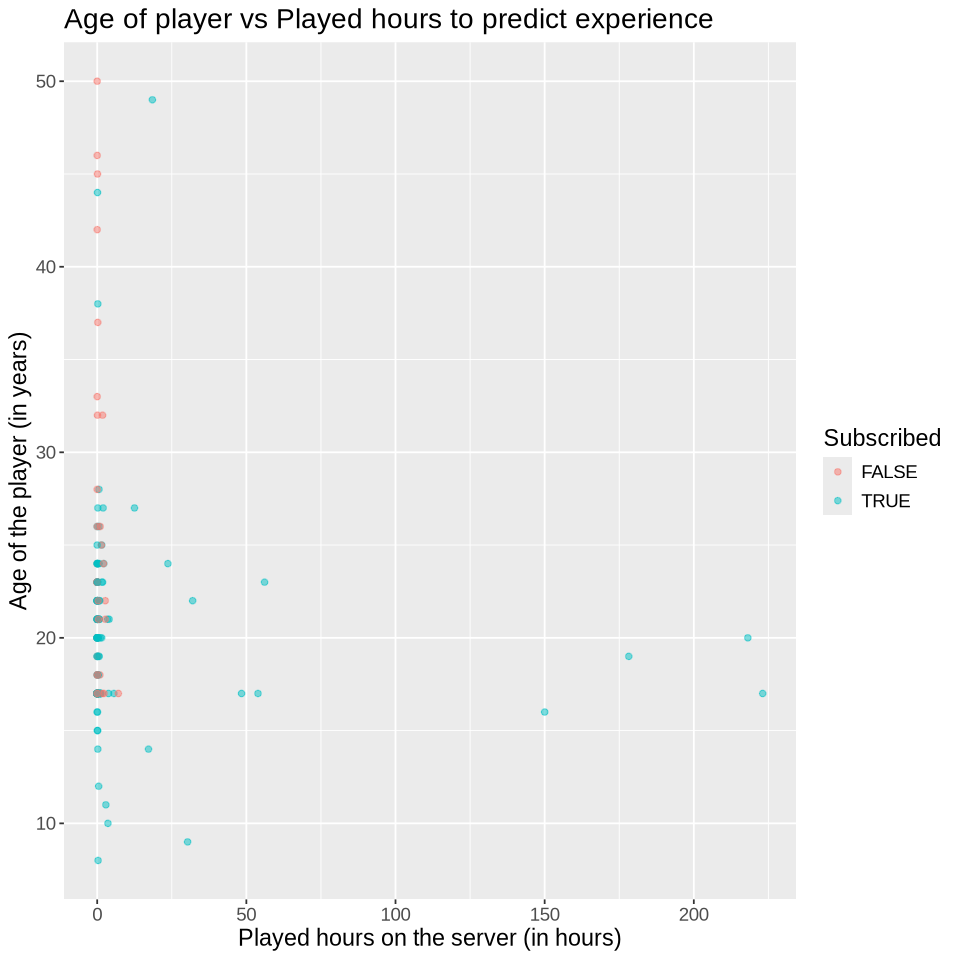

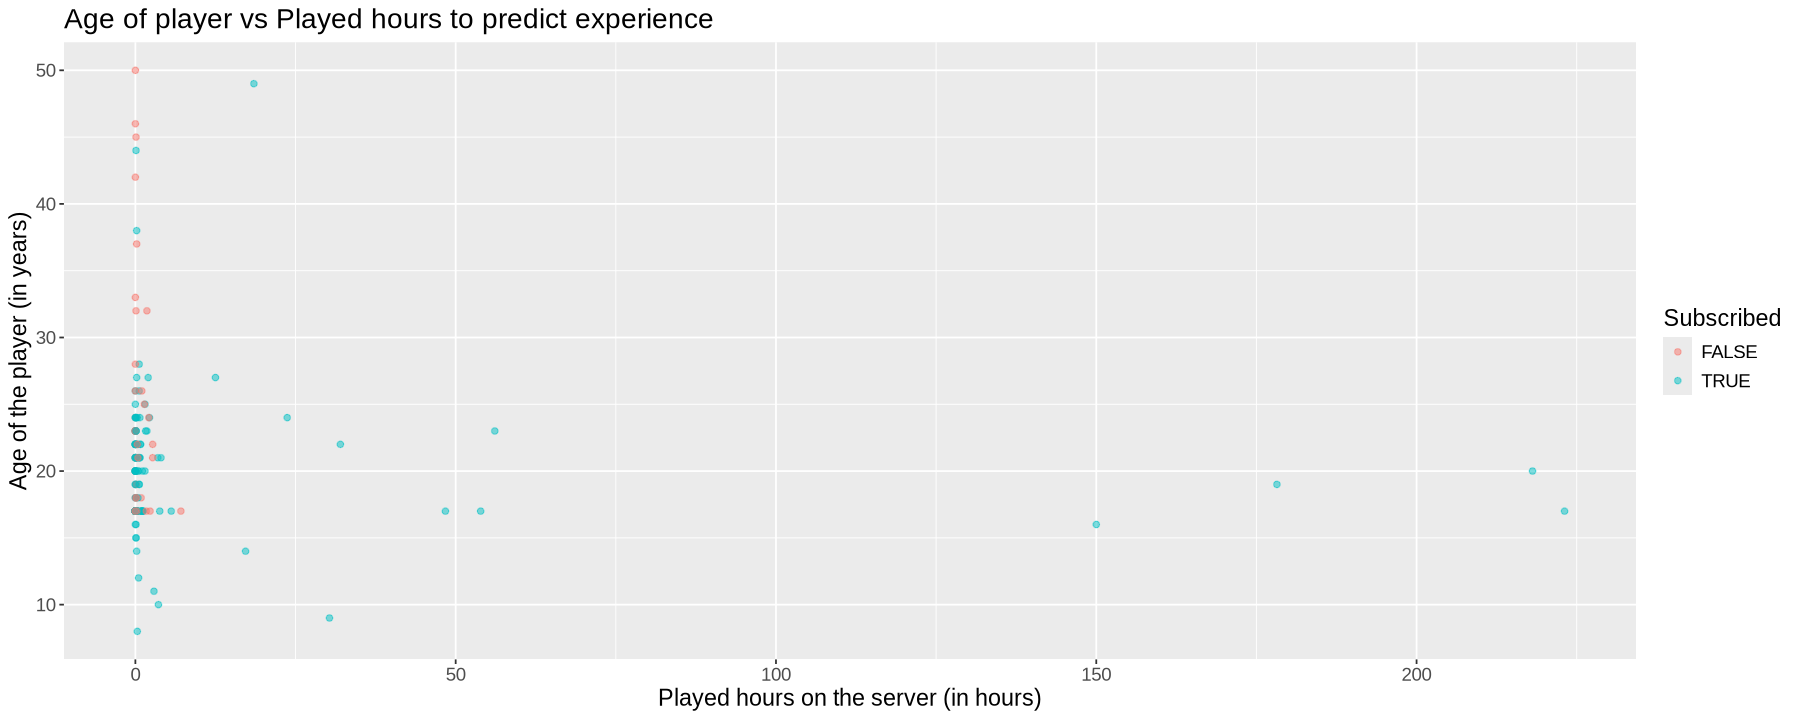

In [74]:
# Wrangling the data
players_tidy <- players |>
                filter(Age != 'NA') |>
                select(Age, subscribe, played_hours)


# mean of each quantitive vairables
summarize(players_tidy, 
          mean_age = mean(Age),
          mean_played_hours = mean(played_hours))

players_recipe <- recipe(subscribe ~ ., data = players_tidy)
players_recipe

players_recipe <- players_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

scaled_players <- bake(players_recipe, players_tidy) 

options(repr.plot.width = 8, repr.plot.height = 8)

players_plot_1 <- players_tidy |>
                  ggplot(aes(x = played_hours, y = Age, color = subscribe)) + 
                  geom_point(alpha = 0.5) + 
                  labs(y = "Age of the player (in years)", 
                       x = "Played hours on the server (in hours)",
                       title = "Age of player vs Played hours to predict experience",
                       color = "Subscribed") + 
                  theme(text = element_text(size = 14))
                    
players_plot_1             

options(repr.plot.width = 15, repr.plot.height = 6)

players_plot_2 <- players_tidy |>
                  ggplot(aes(x = played_hours, y = Age, color = subscribe)) + 
                  geom_point(alpha = 0.5) + 
                  labs(y = "Age of the player (in years)", 
                       x = "Played hours on the server (in hours)",
                       title = "Age of player vs Played hours to predict experience",
                       color = "Subscribed") + 
                  theme(text = element_text(size = 14))
                    
players_plot_2  

A problem I encountered and anticipated, is that many of the players only played for a few hours or less, with a few outliers playing 150 and more. This meant the visulization was stretched, and compressed all the data below 10 hours.
These visualizations did show me that all players that had a played_hours over 25 hours were subscribed to the newsletter. The majority of those not subscribed to the newsletter had played under 10 hours

**Question 4**

The method I will use to address my question will be KNN classification. Classification was chosen because the response variable is not a number, so it couldn't be regression, but a class. KNN classification generally requires few assumptions to perform, which is a benefit to this method. However, there are potential limitations to KNN classification such as it becoming slow as the training data becomes larger, it doesn't perform well with many predictors and it may not perform well when classes are imbalanced. Since we only have 2 predictors, the second weakness is not an issue, however the classes may be imbalanced as there seems to be more who are subscribed to the newsletter than not. 
I will process the data by centering and scaling it to start.
I will also be splitting the data into training and testing data sets, with a split of 0.75. 
I will use cross validation 5 fold to ensure the model is working as intended.

